# A Sophisticated Delicacy for the Aesthetes

The World Museum of Cakes is hosting its grand opening and they are having a competition for the best cake. In your quest to obtain the **Golden Food Truck** you decide to enter the competition!


## Part 1:


For your masterpiece, you will go with a classic: a multi-layer cake (see image). Create a *recursive function* that builds such a cake for any number of layers N. Then show an image of a 5-layer cake. At the top there should be a circular cherry.

Recipe details:
*   The base of the first layer must be 2/3 of N+1.
*   Each subsequent layer's base is 2/3ds the layer below it.
*   The height of each layer is 1.
*   All layers must be centered at 0.
*   Each layer must change color according to the Pastel1 color map in matplotlib. The cherry can be any color, we recommend "firebrick".

Coding help:
*   To help you with the plotting part, we have provided some code snippets, you can use it or write your own.
*   The documentation for matplotlib's patches is [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Circle.html) for the circle, and [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html) for the rectangle.
*   If you don't know what a recursive function is, take a look at the help snippet we provide. The important parts are: 1) a stopping criterion, and 2) a recursive element.

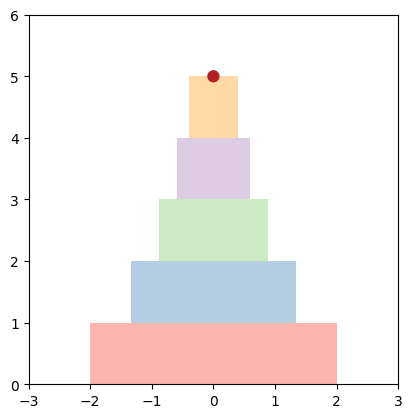



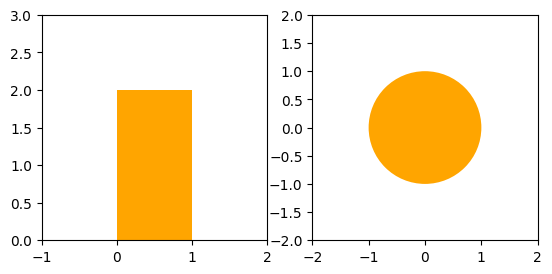

In [ ]:
# Help snippet for drawing rectangles and circles:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle

figure, (axis1, axis2) = plt.subplots(1,2)

# This is how you would make a rectangle with lower left corner at (0,0):
my_rec = Rectangle(xy = (0,0), width = 1, height = 2, facecolor = "orange")
axis1.add_patch(my_rec)
axis1.set_xlim(left = -1, right = 2)
axis1.set_ylim(bottom = 0, top = 3)
axis1.set_aspect('equal', adjustable='box')


# And here how you would make a circle centered at (0,0) and of radius 1:
my_circ = Circle(xy = (0,0), radius = 1, facecolor = "orange")
axis2.add_patch(my_circ)
axis2.set_xlim(left = -2, right = 2)
axis2.set_ylim(bottom = -2, top = 2)
axis2.set_aspect('equal', adjustable='box')



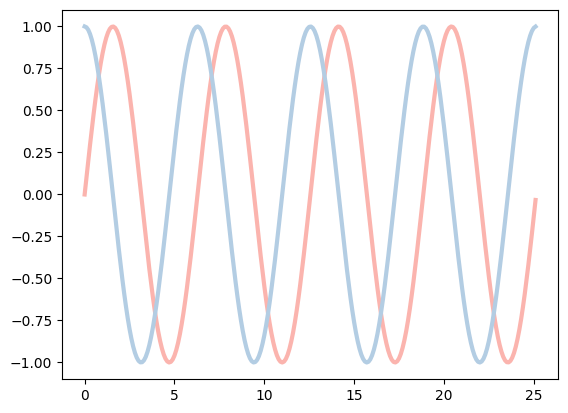

In [ ]:
# Help snippet for using a color map:
import numpy as np

cmap = plt.get_cmap("Pastel1")

x = np.arange(0, 8*np.pi, .1)
plt.plot(x, np.sin(x), color = cmap(0), linewidth = "3")
plt.plot(x, np.cos(x), color = cmap(1), linewidth = "3")

In [ ]:
# Help snippet for a recursive function:

def my_factorial(n):
  # stop criterion
  if n <= 1:
    x = 1
  else:
    x = n * my_factorial(n-1)
  return x;

## Part 2

You are challenged by your rival chefs to create a mega cake that looks like the picture below.

Your strategy is to delegate parts of the cake to your sous-chefs, who will in turn delegate to other chefs themselves. You build a network that will help guide the process.

Write a recursive function that builds the cake below according to the network provided. Some useful functions have been given to help you out.

**Note 1:** for each sub-cake, the size of the components is calculated as follows:
*   Divide equally among the number of sub-cakes, that is a cake's personal space
*   The size of the actual cake is then 2/3 of its personal space (the base), the height is still 1.

**Note 2:** You must use the network of chefs provided to you. Do not alter that.

**Note 3:** Node 1 on the graph corresponds to the bottom layer, nodes 2, 3, and 4 correspond to the following layer (blue), etc.

### Image of Mega Cake


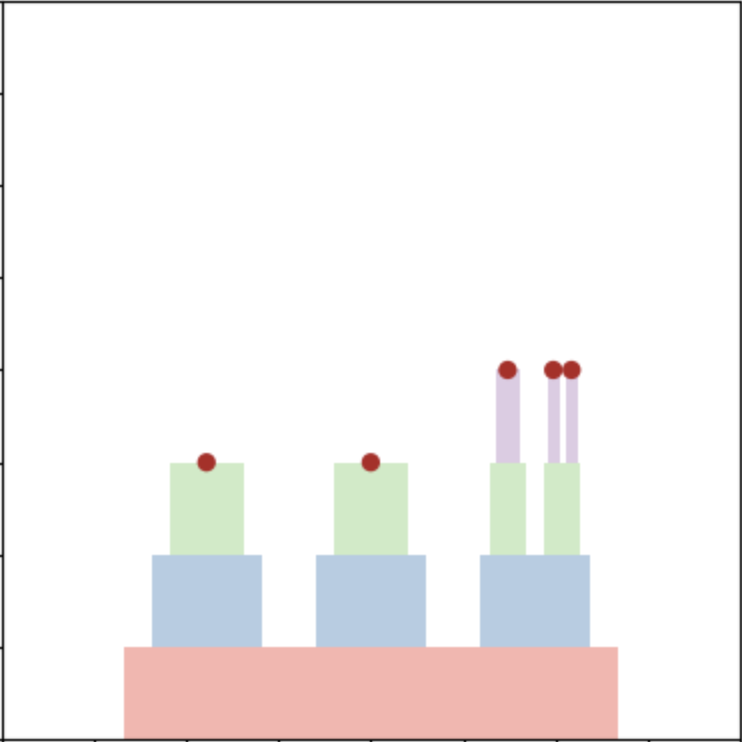



### Helping code

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
# Building the network using networkx package
chef_connections = [(1,2), (1,3), (1,4), (2,5), (3,6), (4,7), (4,8), (7,9), (7,10), (8,11)]
G = nx.Graph(chef_connections)

In [ ]:
# This is how you see the list of nodes:
nodes_G = list(G.nodes)
print(nodes_G)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


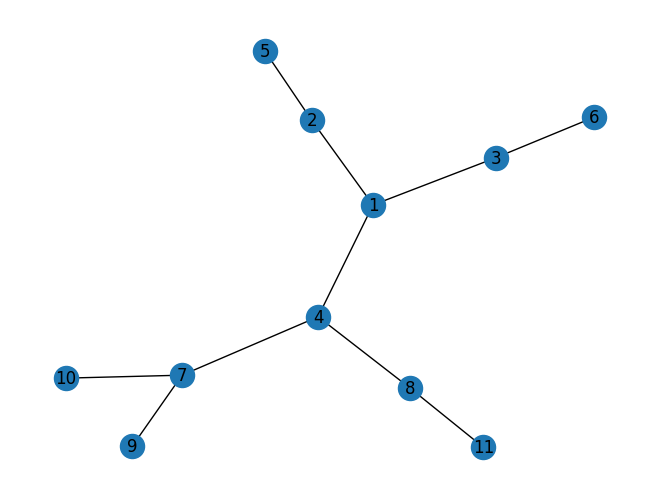

In [ ]:
# This is how you visualize the graph:
nx.draw(G, with_labels = True)

In [ ]:
# The following gives you the neighbors of a node, for example for the neighbors of node 1:
neighs = list(G.neighbors(1))
print(neighs)

[2, 3, 4]


In [ ]:
# The following is useful if you want to take the set difference of two lists:
listA = [1,2,3]
listB = [2,4,5]

set_diff = set(listA).difference(listB)
print(set_diff)
list_diff = list(set_diff) # You can always turn it back into a list
print(list_diff)

{1, 3}
[1, 3]


In [ ]:
# This function will help you determine the coordinates of the cake elements at different layers:
  # 1) In particular, it computes the bottom-left corner of the rectangle for a cake component,
      # but relative to the center of its parent!!
  # 2) It assumes each cake component is 2/3 its own personal space (see Note 1 in the instructions)
  # 3) Since it gives bottom-left corner coordinates, and these are relative to the parent's center coordinates,
      # you may still need to do simple adjustments in your main recursion function and your draw functions.

def determine_base_coordinate(own_index, N, parent_base):
  """
  own_index : int
    the index of the current node with respect to a list of "siblings"
      - for example, in the network (2)<--(1)-->(3), 2 and 3 would be "siblings", listed as [0,1], "own_index" for 2 would be "0"
      - in the network (1)-->(2,3,4), the siblings are 2, 3, and 4, and a list of them would be [0, 1, 2] "own_index" for 3 would be "1".
  N : int
    number of siblings (including current node)
  parent_base: float
    the size of the parent's cake layer
  """
  if N%2 == 0:
    centered_index = own_index - (N/2 - 1)
    rec_coordinates = (centered_index - 5/6)*parent_base/N
  else:
    centered_index = own_index - (N-1)/2
    rec_coordinates =  (centered_index - 1/3) * parent_base/N
  return rec_coordinates;